In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df_train = pd.read_csv("profiled_words.tsv", sep='\t')  # Averaged num of senses
df_test = pd.read_csv("sem_cluster_data.tsv", sep='\t')  # Annotated dataset

In [52]:
df_train

,Lemma,PoS,Freq(ipm),rnc_num_senses,wiktionary_num_senses,ruwordnet_num_senses,Mean,Anim,Inan,Acc,...,nummod_child,obj_child,obl_child,orphan_child,parataxis_child,punct_child,reparandum_child,root_child,vocative_child,xcomp_child
0,город,s,573.4,2,1,1,1,0.017139,0.982861,0.177279,...,0.008146,0.000070,0.007004,0.002772,0.015711,0.329734,0.0,0.0,0.0,0.000015
1,данные,s,229.0,2,1,1,1,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,ночь,s,402.8,1,1,1,1,0.003161,0.996839,0.290289,...,0.036698,0.000584,0.012420,0.004170,0.018508,0.236246,0.0,0.0,0.0,0.000038
3,тысяча,s,416.0,1,1,1,1,0.001647,0.998353,0.117644,...,0.261481,0.000835,0.007506,0.003587,0.012978,0.274962,0.0,0.0,0.0,0.000161
4,правительство,s,277.7,1,1,1,1,0.000937,0.999063,0.032755,...,0.006653,0.000038,0.004600,0.003422,0.013459,0.272489,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,работа,s,1058.3,8,1,5,5,0.007023,0.992977,0.210493,...,0.007525,0.000181,0.007190,0.001688,0.020062,0.234019,0.0,0.0,0.0,0.000005
96,место,s,926.6,10,1,5,5,0.006104,0.993896,0.244353,...,0.013041,0.000174,0.007668,0.002403,0.017973,0.198480,0.0,0.0,0.0,0.000032
97,партия,s,250.4,9,1,5,5,0.000837,0.999163,0.126183,...,0.027279,0.000204,0.003752,0.002443,0.020503,0.244874,0.0,0.0,0.0,0.000029
98,движение,s,244.7,9,1,4,5,0.001049,0.998951,0.153273,...,0.014064,0.000680,0.006202,0.001580,0.018305,0.211695,0.0,0.0,0.0,0.000020


In [53]:
df_test = df_test.groupby('word').gold_sense_id.nunique().reset_index()

In [55]:
df_test = df_test.merge(df_train, left_on='word', right_on='Lemma')

In [56]:
df_test

,word,gold_sense_id,Lemma,PoS,Freq(ipm),rnc_num_senses,wiktionary_num_senses,ruwordnet_num_senses,Mean,Anim,...,nummod_child,obj_child,obl_child,orphan_child,parataxis_child,punct_child,reparandum_child,root_child,vocative_child,xcomp_child
0,бог,3,бог,s,425.4,2,1,1,1,0.961637,...,0.005047,0.000825,0.009624,0.020158,0.042093,0.463437,0.0,0.0,0.0,0.000199
1,время,6,время,s,2015.7,9,1,5,5,0.000172,...,0.012979,0.000195,0.009190,0.002788,0.013224,0.163755,0.0,0.0,0.0,0.000009
2,год,3,год,s,3727.5,5,1,1,2,0.022970,...,0.281011,0.000257,0.011223,0.001760,0.011463,0.257913,0.0,0.0,0.0,0.000005
3,голова,4,голова,s,709.4,10,1,4,5,0.016876,...,0.007941,0.000360,0.008069,0.004598,0.013923,0.228563,0.0,0.0,0.0,0.000032
4,город,2,город,s,573.4,2,1,1,1,0.017139,...,0.008146,0.000070,0.007004,0.002772,0.015711,0.329734,0.0,0.0,0.0,0.000015
5,государство,3,государство,s,326.4,1,1,1,1,0.000954,...,0.015004,0.000107,0.003484,0.003484,0.020764,0.338512,0.0,0.0,0.0,0.000000
6,дело,11,дело,s,1412.1,11,2,4,6,0.000785,...,0.003766,0.000678,0.005448,0.002430,0.032431,0.304191,0.0,0.0,0.0,0.000072
7,жена,2,жена,s,376.8,2,1,1,1,0.972255,...,0.006410,0.000760,0.006165,0.006978,0.018260,0.316811,0.0,0.0,0.0,0.000192
8,женщина,1,женщина,s,533.3,1,1,2,1,0.975792,...,0.025825,0.000120,0.006833,0.007902,0.027978,0.308645,0.0,0.0,0.0,0.000016
9,место,7,место,s,926.6,10,1,5,5,0.006104,...,0.013041,0.000174,0.007668,0.002403,0.017973,0.198480,0.0,0.0,0.0,0.000032


In [57]:
df_train = df_train.loc[~df_train.Lemma.isin(set(df_test.word.tolist()))]

In [62]:
X, y = df_train.loc[:, 'Anim' : 'nummod_child'].to_numpy(), df_train.Mean.to_numpy()
X_test, y_test = df_test.loc[:, 'Anim' : 'nummod_child'].to_numpy(), df_test.gold_sense_id.to_numpy()

In [63]:
parameters = {'max_depth':range(3,20)}
reg = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
reg.fit(X=X, y=y)
tree_model = reg.best_estimator_

In [64]:
y_pred = tree_model.predict(X_test)

In [68]:
y_pred

array([3., 3., 5., 2., 4., 2., 4., 2., 1., 4., 4., 4., 3., 5., 3., 3., 2.])

In [65]:
mean_absolute_error(y_pred, y_test)

2.7058823529411766

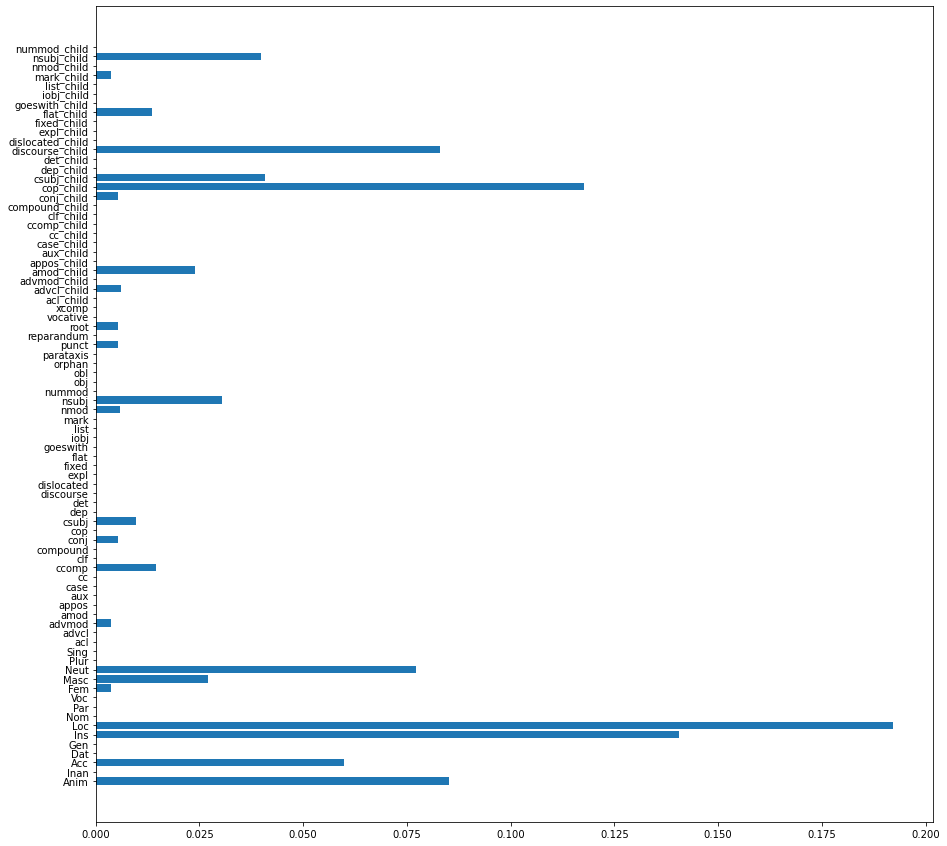

In [67]:
plt.figure(figsize=(15, 15))
plt.barh(np.arange(len(tree_model.feature_importances_)), tree_model.feature_importances_)
plt.yticks(np.arange(len(df_test.loc[:, 'Anim' : 'nummod_child'].columns)), df_test.loc[:, 'Anim' : 'nummod_child'].columns)
plt.show()